In [1]:
import os
import pandas as pd
pd.options.display.max_rows = 999

%matplotlib
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib

Using matplotlib backend: MacOSX


In [2]:
import sys
sys.path.insert(0,'..')
from pyASTRAHL.api import * 

In [3]:
output_folder = "../evaluation/empirical"

# Data Parsing

In [4]:
%%time

# Get all data-files and parse them
FT_dicts = {}
for FT_folder in os.listdir(output_folder):  # iterate over FT_X folders
    if not FT_folder.startswith("FT"):
        continue
    
    FT_dicts[FT_folder] = {}  # SPs
    for SP_folder in os.listdir(os.path.join(output_folder, FT_folder)):  # iterate over FT_X/SP_Y folders
        if not SP_folder.startswith("SP"):
            continue  

        FT_dicts[FT_folder][SP_folder] = {}
        for allowance_file in os.listdir(os.path.join(output_folder, FT_folder, SP_folder)):    # iterate over FT_X/SP_Y/Allowance_Z files
            f = os.path.join(output_folder, FT_folder, SP_folder, allowance_file)
            allowance = int(allowance_file.replace("Allowance_", "").replace(".json", ""))
            FT_dicts[FT_folder][SP_folder][allowance] = pd.read_json(f)

CPU times: user 57.3 s, sys: 2.63 s, total: 60 s
Wall time: 1min


In [5]:
big_df = pd.DataFrame(FT_dicts).transpose().sort_index().sort_index(axis=1)

In [6]:
# We can extract data like this
big_df.loc["FT_10", "SP_20"]  # FT + Starting Point -> Dict[Allowance: FaultDist DF]

# FT + Starting Point + Allowance -> DF (rows: Fault Distribution, column: competitors, cells: Average Sys Unreliability of 100 runs)
pd.DataFrame(big_df.loc["FT_40", "SP_20"][60])  

,Astrahl,Uniform,Prop,Delta_Uniform,Delta_Prop
0,0.051834,0.090933,0.086044,-0.039100,-0.034211
1,0.058788,0.092082,0.094936,-0.033293,-0.036148
2,0.048974,0.094421,0.089360,-0.045447,-0.040386
3,0.052742,0.096492,0.096806,-0.043750,-0.044064
4,0.052637,0.089942,0.089935,-0.037305,-0.037298
5,0.097712,0.176893,0.169751,-0.079181,-0.072039
6,0.056319,0.090122,0.094146,-0.033803,-0.037826
7,0.061780,0.091923,0.090144,-0.030143,-0.028365
8,0.067093,0.099495,0.104524,-0.032402,-0.037431
9,0.049263,0.095040,0.090927,-0.045777,-0.041665


# From each cell, extract Astrahl's / the competitor's mean system reliability (across SPs), then calculate the mean

For a given FT, the average across SPs changes a lot

CPU times: user 9.44 s, sys: 94.6 ms, total: 9.53 s
Wall time: 9.52 s


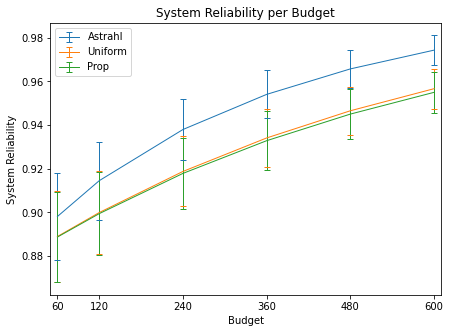

In [7]:
%%time

def extract_and_average(ft_sp_cell, column, budget):
    return pd.DataFrame(ft_sp_cell[budget]).mean()[column]
    
budgets = [60, 120, 240, 360, 480, 600]

ax = None
means = {}
for competitor in ["Astrahl", "Uniform", "Prop"]:
    budget_to_competitor_dict = {}
    for budget in [60, 120, 240, 360, 480, 600]:
        # get a DF (FT x SP) for a specific budget & competitor that averages across Fault Distributions
        # then, average across SPs 
        ft_sp_df = big_df.applymap(lambda ft_sp_cell: extract_and_average(ft_sp_cell, competitor, budget))
        budget_to_competitor_dict[budget] = ft_sp_df.mean(axis=1)  # produces {FT: avg(SP_sys_unreliability)}
    
   
    # calculate the mean across FT and SPs:
    competitor_df = 1 - pd.DataFrame(budget_to_competitor_dict)  # competitor_df has as rows the FTs, and as columns the budgets
    # display(competitor_df)
    ax = competitor_df.mean().plot(ax=ax, yerr=competitor_df.sem(), markersize=5, 
                            title="System Reliability per Budget",
                            xlabel="Budget", ylabel="System Reliability",
                            label=competitor, linewidth=1, capsize=3, figsize=(7,5), xticks=budgets, xlim=(50,610)) #, logx=True)
    
    # save for later, not used for plotting
    means[competitor] = competitor_df.mean() 
    
ax.legend()
# ax.figure.savefig("EmpiricalPlot.pgf", dpi=400, bbox_inches='tight')

# Quantify the mean advantage of Astrahl over the Competitors
Calculate the realtive difference (Comp. - Astrahl) / Astrahl

In [8]:
# First, calculate the mean System Reliability per allowance for each approach 
# Then, calculate the difference between competitor and Astrahl and divide it by Astrahl's value. What we get is th
mean_df = pd.DataFrame(means).round(4)
mean_df["Uniform Diff %"] = ((mean_df["Uniform"] - mean_df["Astrahl"]) / (1 - mean_df["Astrahl"]) * 100).round(decimals=2)
mean_df["Prop Diff %"] = ((mean_df["Prop"] - mean_df["Astrahl"]) / (1 - mean_df["Astrahl"]) * 100).round(decimals=2)
# rearrange columns and display
mean_df = mean_df[["Astrahl", "Uniform", "Uniform Diff %", "Prop", "Prop Diff %"]]
mean_df

,Astrahl,Uniform,Uniform Diff %,Prop,Prop Diff %
60,0.8982,0.8890,-9.04,0.8887,-9.33
120,0.9146,0.9000,-17.10,0.8995,-17.68
240,0.9380,0.9188,-30.97,0.9179,-32.42
360,0.9541,0.9341,-43.57,0.9329,-46.19
480,0.9657,0.9466,-55.69,0.9451,-60.06
600,0.9743,0.9567,-68.48,0.9550,-75.10
